In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from reconstruct import DiscreteWindowedRampFilter
from geometry import shepp_logan
from project import acquire_projections

In [2]:
n_pixels = 1001
n_projections = 1200
tau = 0.1

phantom = shepp_logan(n_pixels)
sinogram = acquire_projections(phantom, n_projections=n_projections)


Text(0.5, 1.0, 'Projection at Theta=0º')

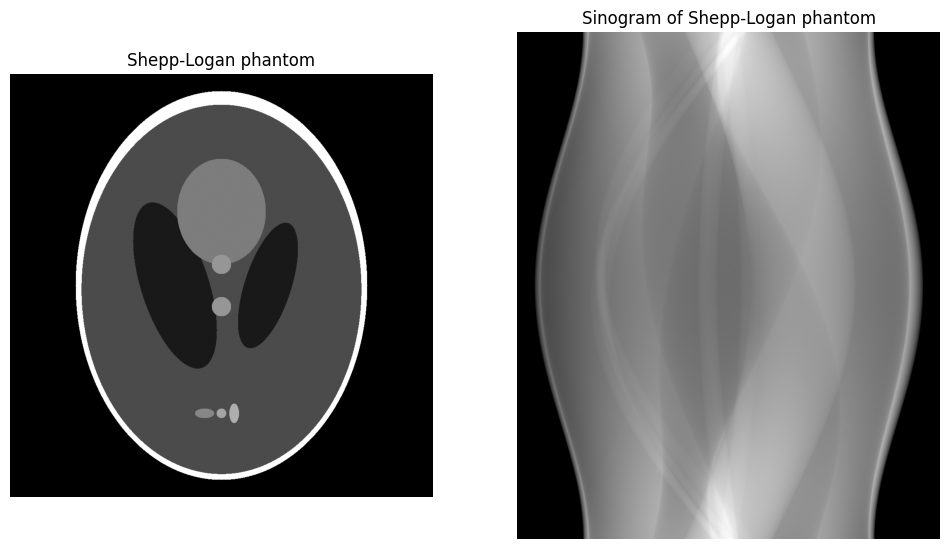

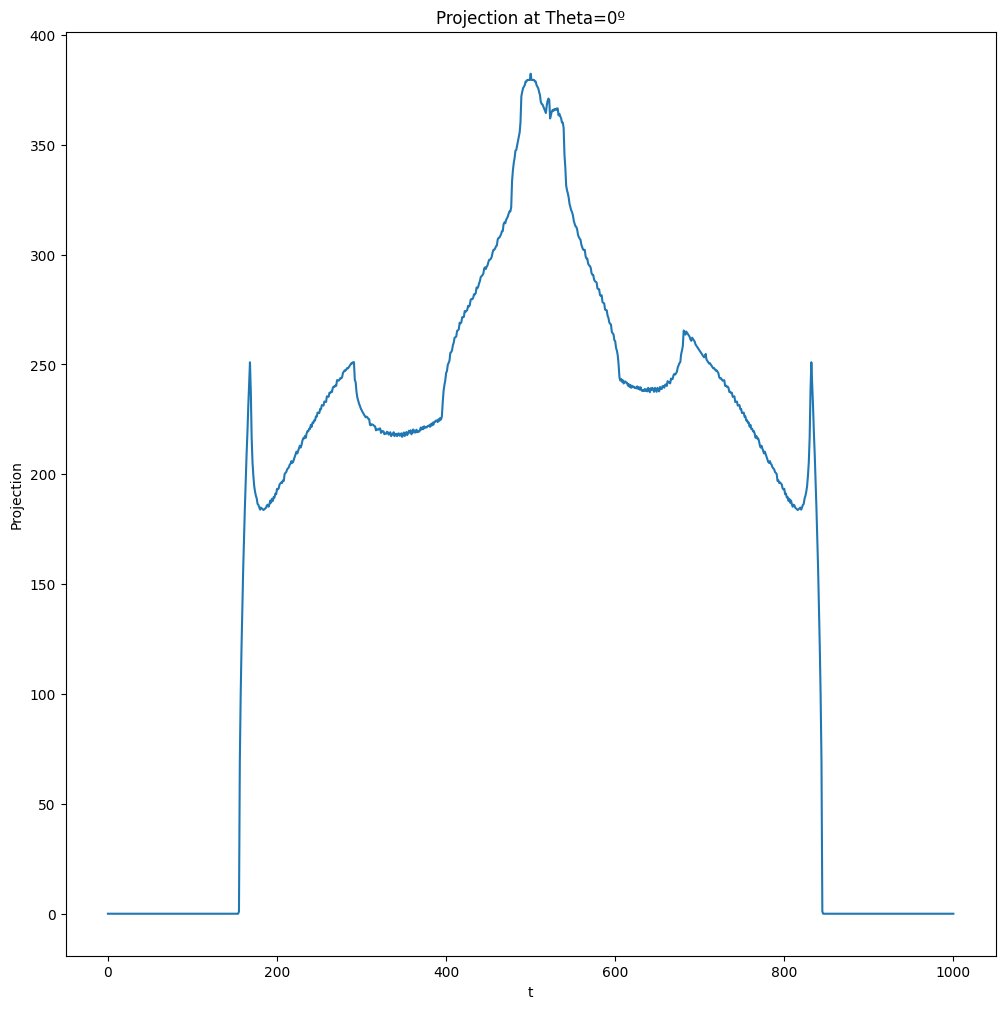

In [3]:
fig, axs = plt.subplots(1,2, figsize=(12, 24))

axs[0].imshow(phantom, cmap="gray")
axs[0].set_title("Shepp-Logan phantom")
axs[0].axis("off")

axs[1].imshow(sinogram, cmap="gray")
axs[1].set_title("Sinogram of Shepp-Logan phantom")
axs[1].axis("off")

fig, ax = plt.subplots(1,1, figsize=(12, 12))
ax.plot(sinogram[0])
ax.set_xlabel("t")
ax.set_ylabel("Projection")

ax.set_title("Projection at Theta=0º")

c:\Users\altp\CT_recon\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\altp\CT_recon\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$t$')

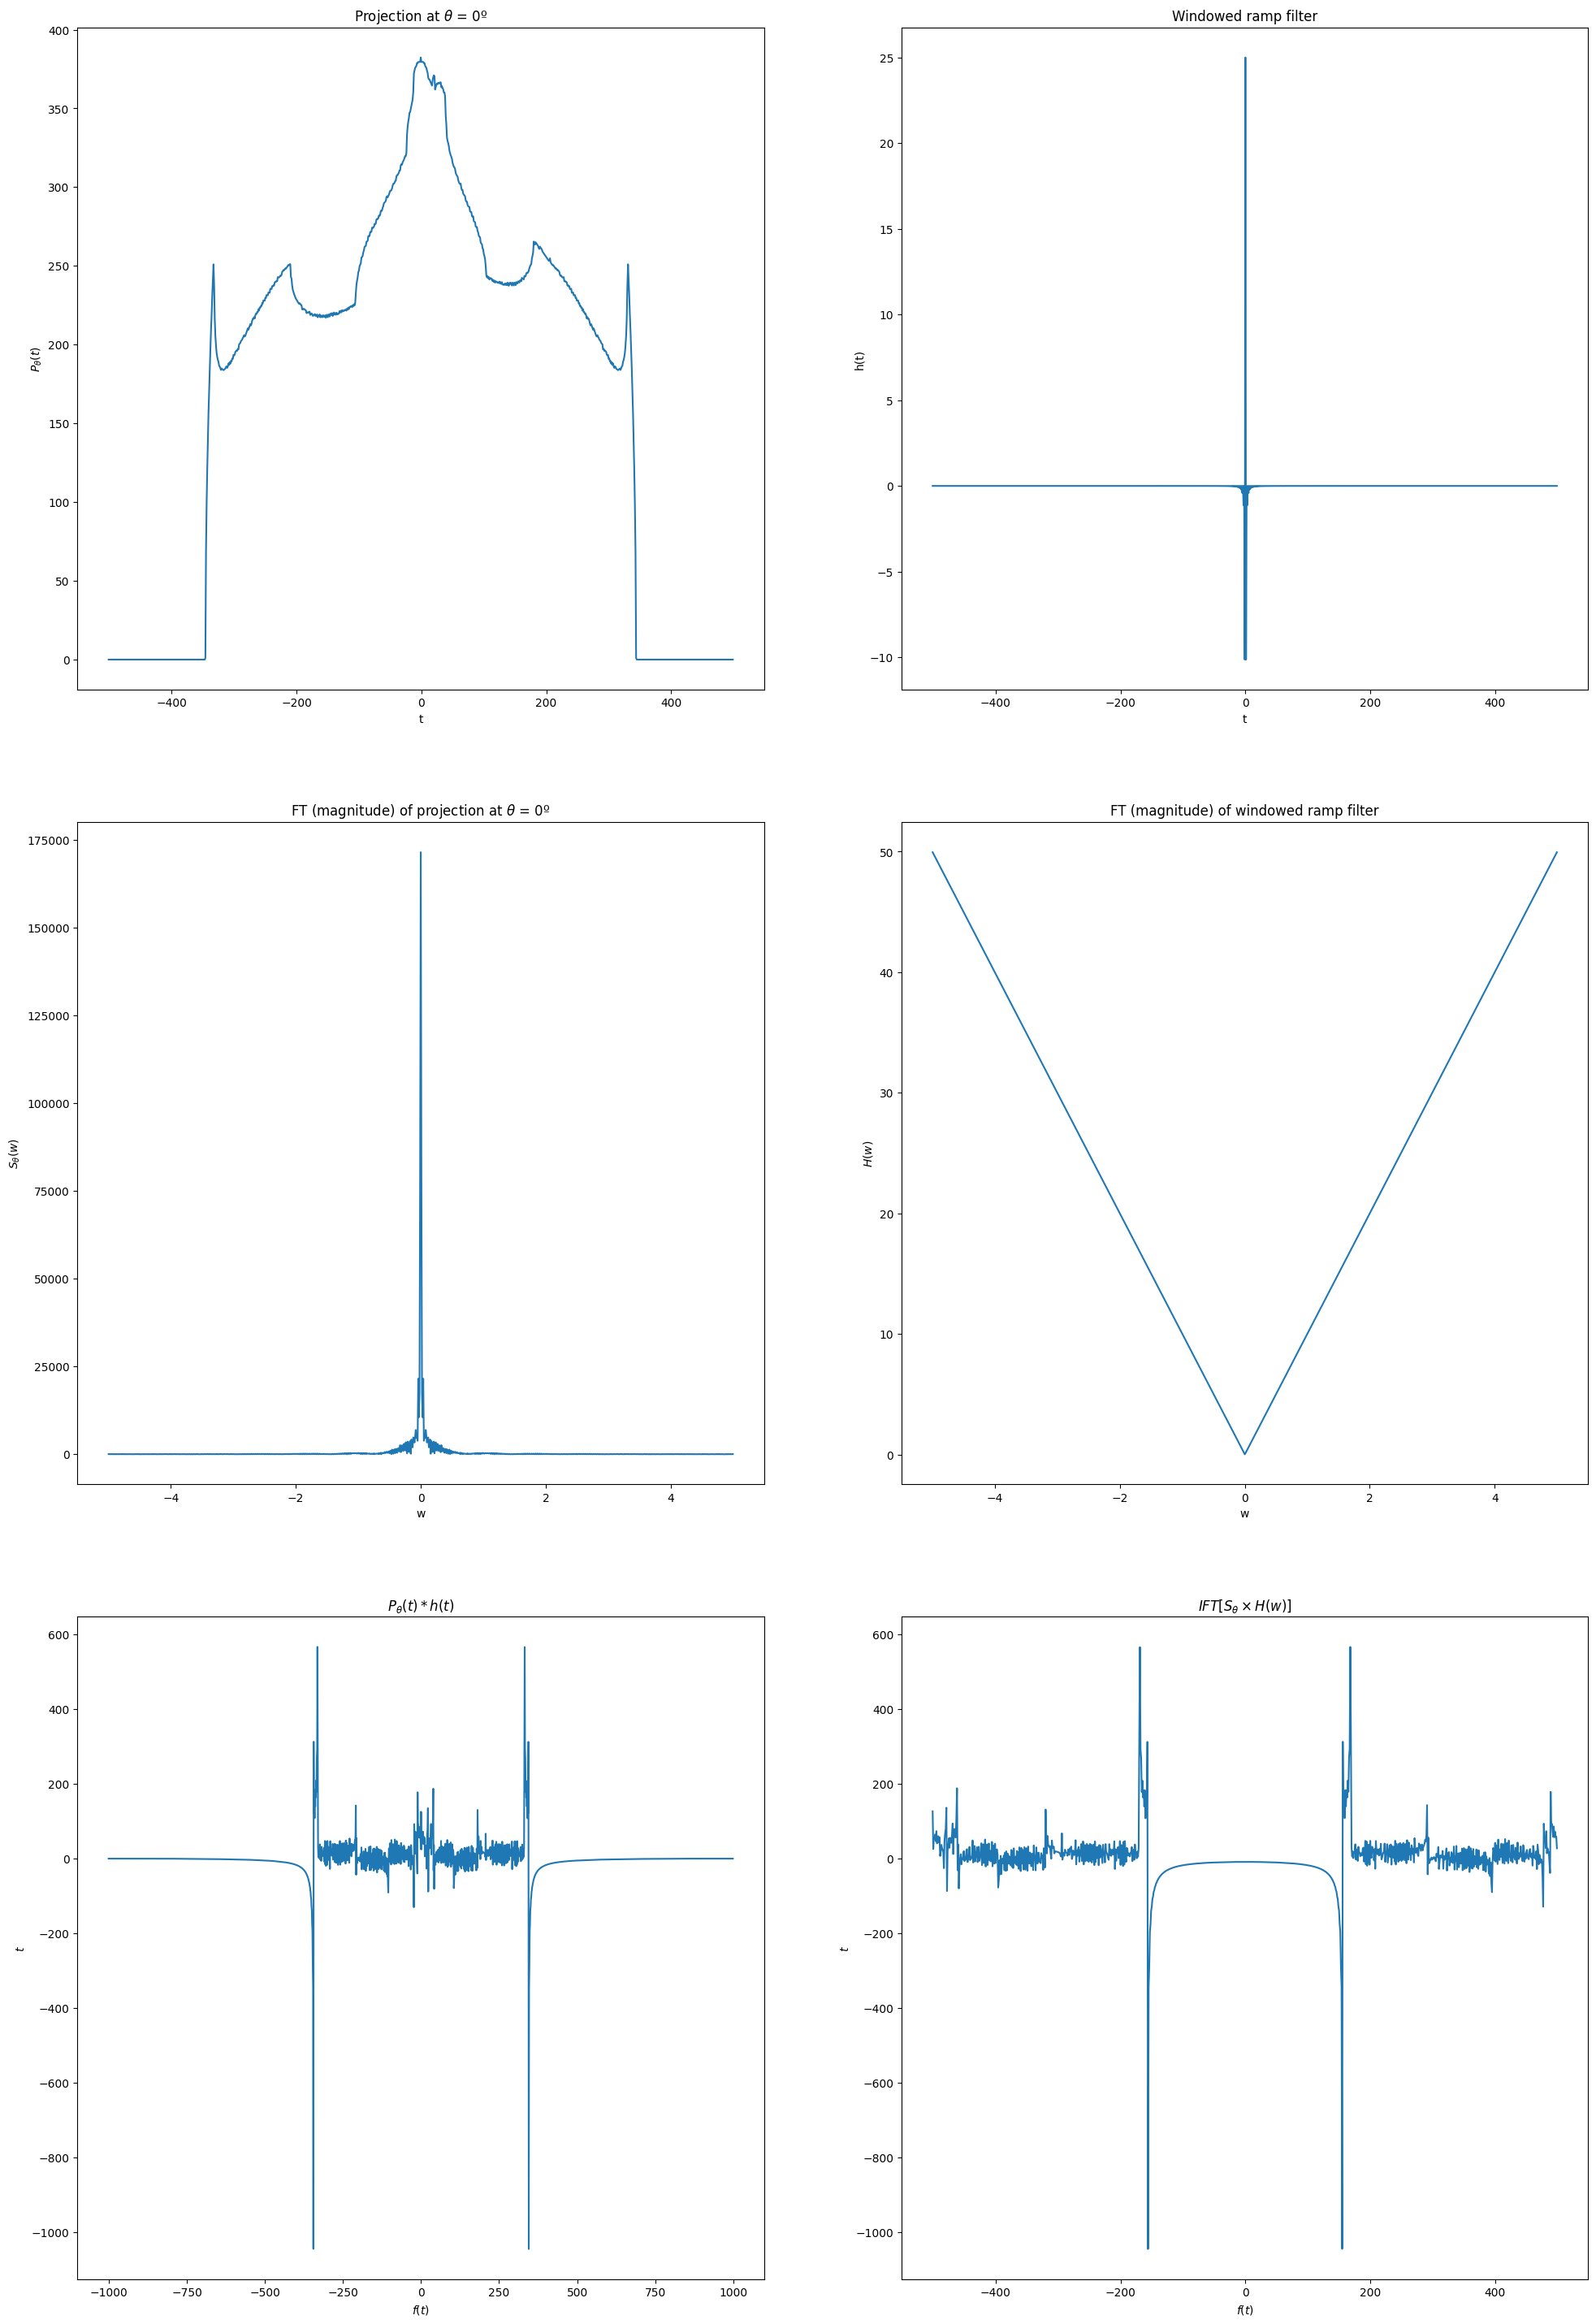

In [4]:
t = np.arange(-n_pixels // 2, n_pixels // 2)

filter = DiscreteWindowedRampFilter(tau)
h_t = filter(t)

P_0 = sinogram[0]

S_0 = np.fft.fftshift(np.fft.fft(P_0))
H_w = np.fft.fftshift(np.fft.fft(h_t))

w = np.fft.fftshift(np.fft.fftfreq(1001, d=tau))

convolution = np.convolve(P_0, h_t)
t_conv = np.arange(-len(convolution) // 2, len(convolution) // 2)

multiplication = np.fft.ifft(np.fft.ifftshift(S_0 * H_w))

fig, axs = plt.subplots(3, 2, figsize=(24, 36))

axs[0,0].plot(t, P_0)
axs[0,0].set_title("Projection at $\\theta$ = 0º")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("$P_\\theta (t)$")

axs[0,1].plot(t, h_t)
axs[0,1].set_title("Windowed ramp filter")
axs[0,1].set_xlabel("t")
axs[0,1].set_ylabel("h(t)")

axs[1,0].plot(w, np.abs(S_0))
axs[1,0].set_title("FT (magnitude) of projection at $\\theta$ = 0º")
axs[1,0].set_xlabel("w")
axs[1,0].set_ylabel("$S_{\\theta}(w)$")

axs[1,1].plot(w, np.abs(H_w))
axs[1,1].set_title("FT (magnitude) of windowed ramp filter")
axs[1,1].set_xlabel("w")
axs[1,1].set_ylabel("$H(w)$")

axs[2,0].plot(t_conv, convolution)
axs[2,0].set_title("$P_\\theta (t) * h(t)$")
axs[2,0].set_xlabel("$f(t)$")
axs[2,0].set_ylabel("$t$")

axs[2,1].plot(t, multiplication)
axs[2,1].set_title("$IFT[S_{\\theta} \\times H(w)]$")
axs[2,1].set_xlabel("$f(t)$")
axs[2,1].set_ylabel("$t$")



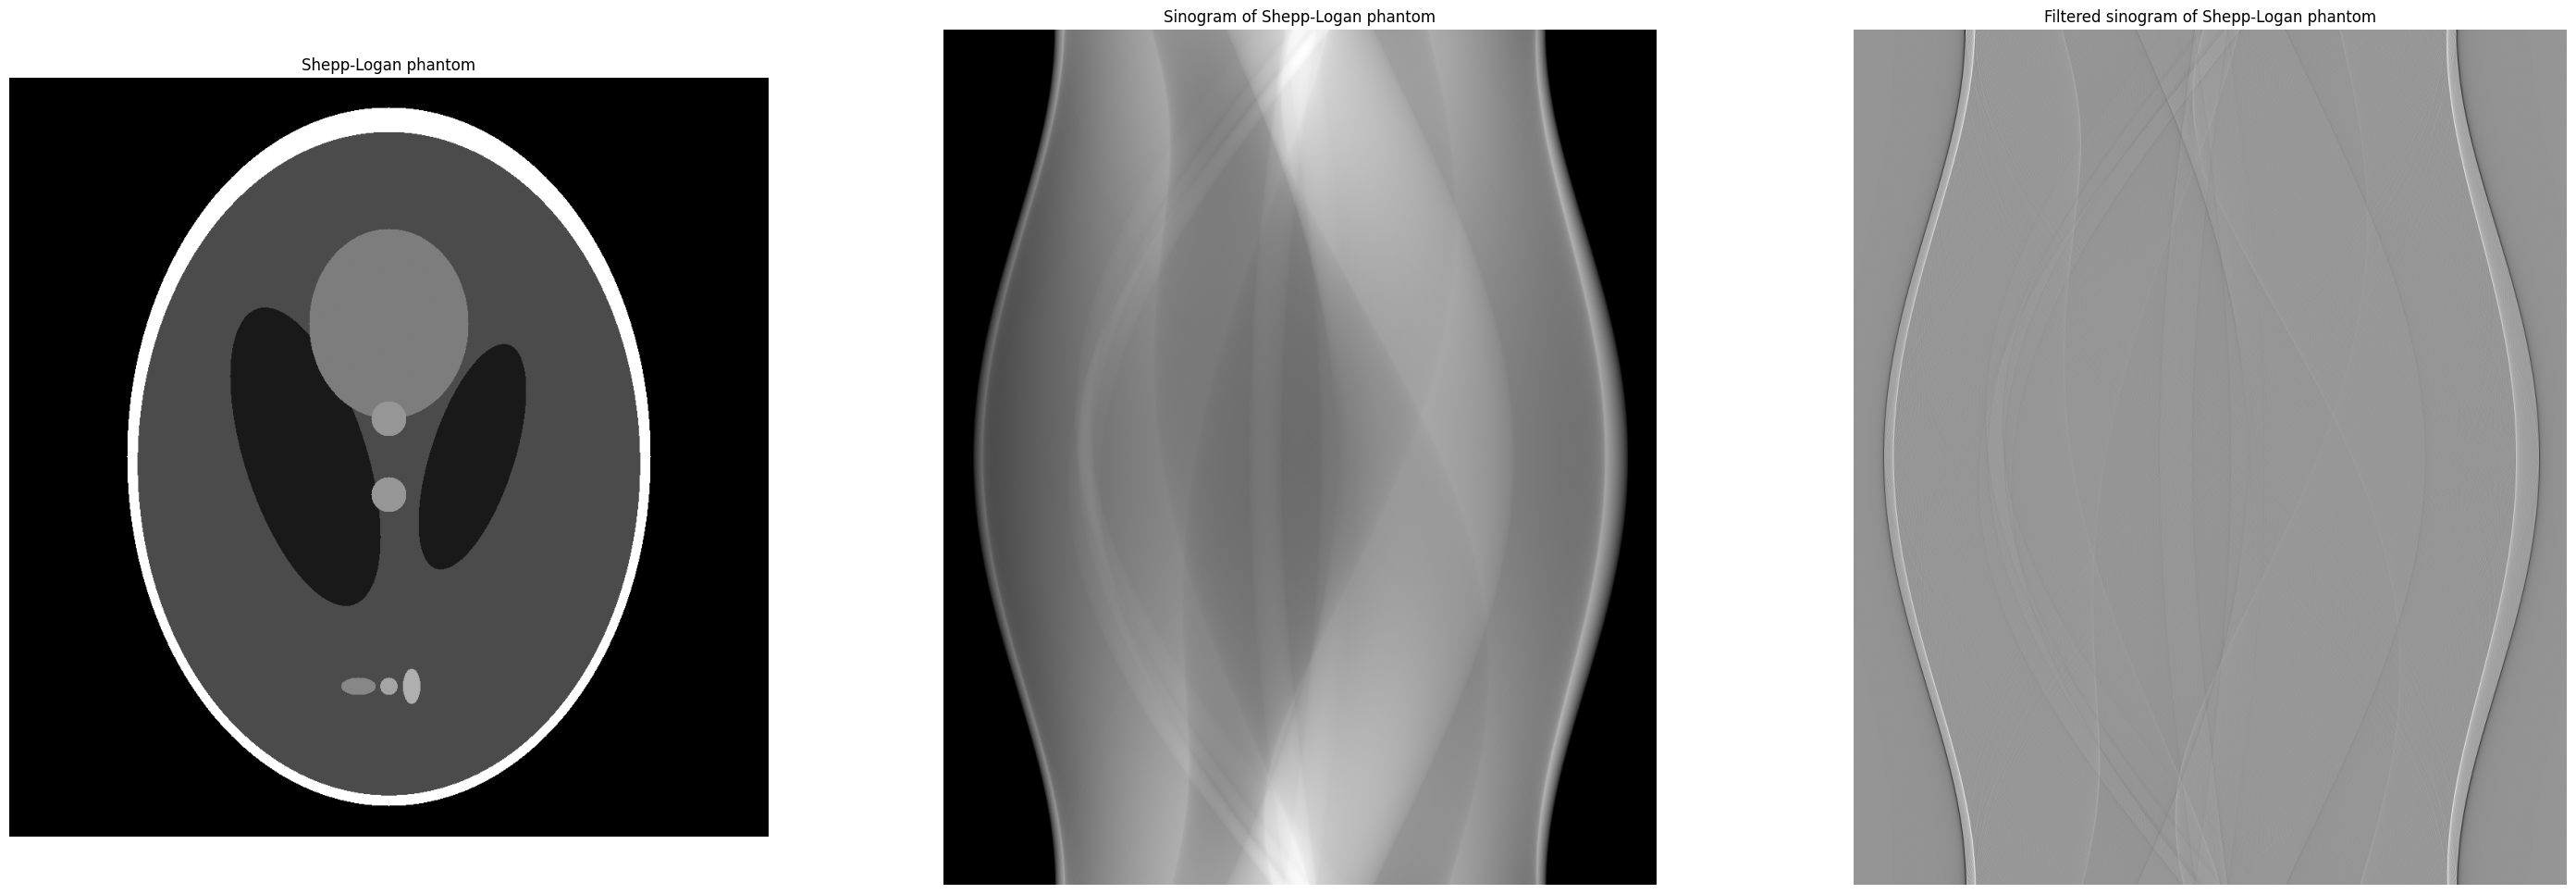

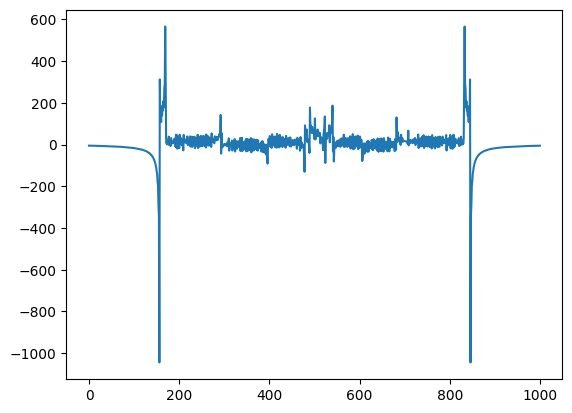

In [5]:
from scipy import signal

fig, axs = plt.subplots(1,3, figsize=(36, 12))

axs[0].imshow(phantom, cmap="gray")
axs[0].set_title("Shepp-Logan phantom")
axs[0].axis("off")

axs[1].imshow(sinogram, cmap="gray")
axs[1].set_title("Sinogram of Shepp-Logan phantom")
axs[1].axis("off")

filtered_sinogram = signal.convolve(sinogram, h_t.reshape(1, -1), mode="same", method="auto")
axs[2].imshow(filtered_sinogram, cmap="gray")
axs[2].set_title("Filtered sinogram of Shepp-Logan phantom")
axs[2].axis("off")

plt.show()

plt.plot(filtered_sinogram[0])

(np.float64(-0.5), np.float64(1000.5), np.float64(1199.5), np.float64(-0.5))

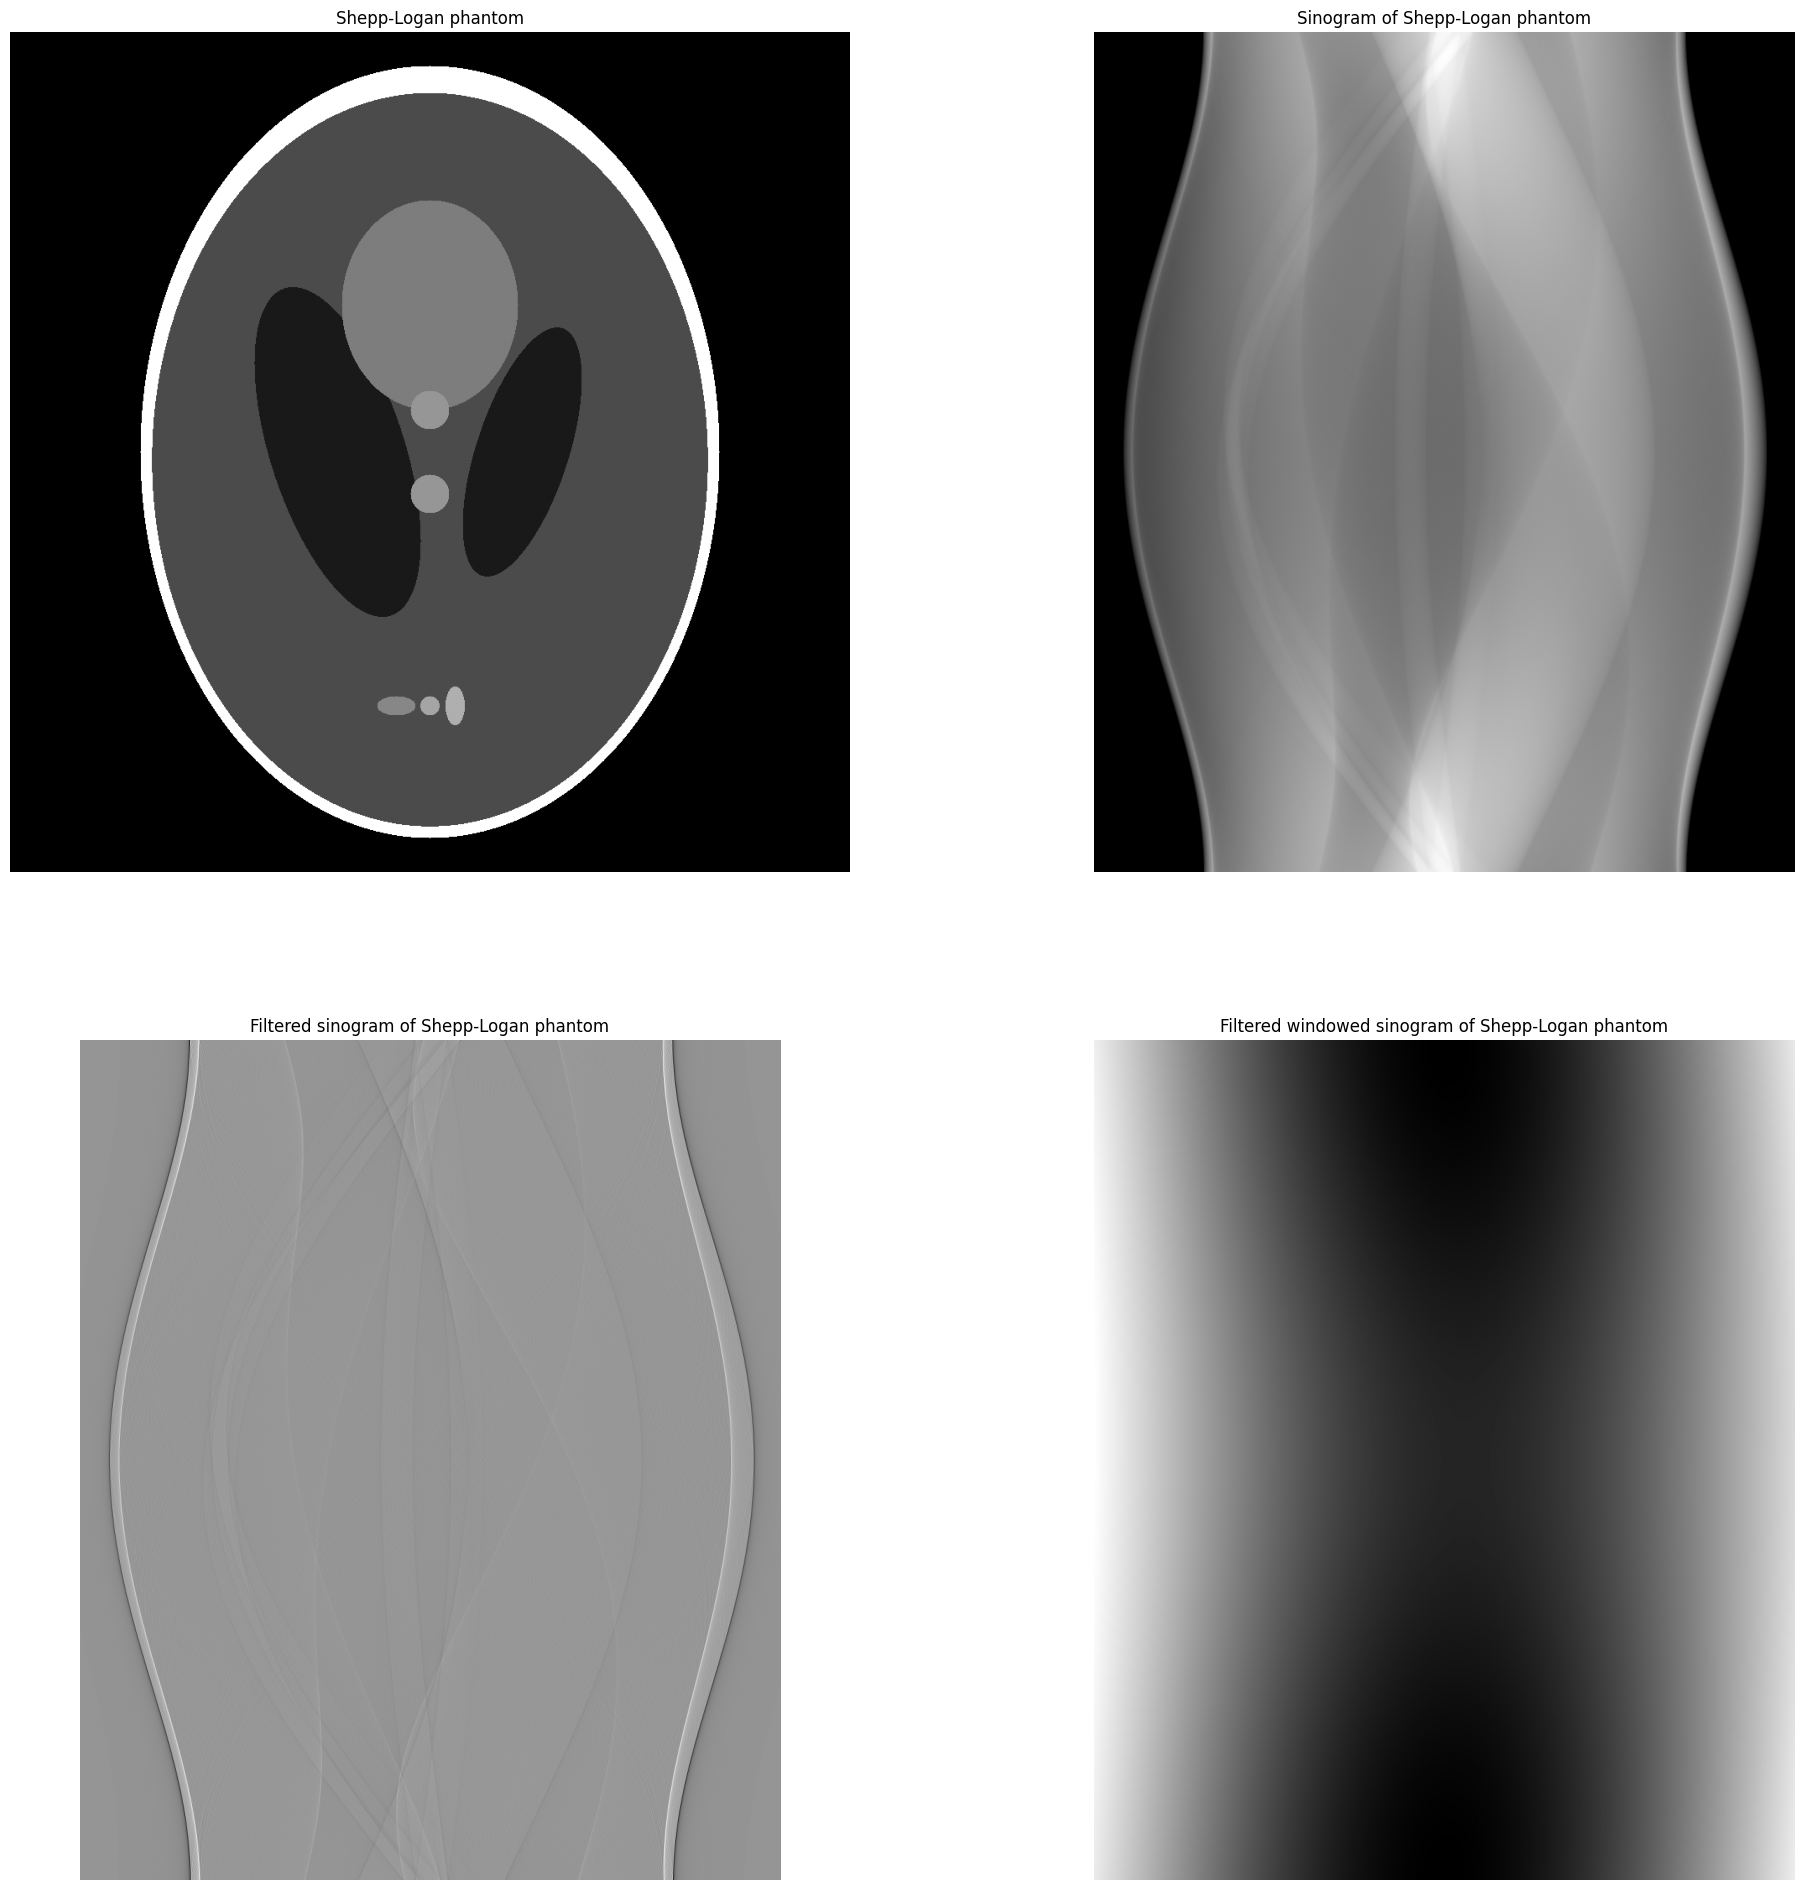

In [6]:
n_proj, n_det = sinogram.shape
n = np.arange(-n_det // 2, n_det // 2)
t = n * tau

filter = DiscreteWindowedRampFilter(tau)
h_t = filter(n)

n_kernel, = h_t.shape

n_fft = n_det + n_kernel - 1

H = np.fft.rfft(h_t, n_fft)
S = np.fft.rfft(sinogram, n_fft, axis=1)

filtered_sinogram = np.fft.irfft(S*H, n_fft, axis=1)

window_time = np.hamming(n_fft)
W = np.fft.rfft(window_time)

filtered_windowed_sinogram = np.fft.irfft(S*H*W, n_fft, axis=1)

start = (n_kernel - 1) // 2
end = start + n_det
filtered_sinogram = filtered_sinogram[:, start:end]
filtered_windowed_sinogram = filtered_windowed_sinogram[:, start:end]

fig, axs = plt.subplots(2,2, figsize=(24, 24))

axs[0,0].imshow(phantom, cmap="gray")
axs[0,0].set_title("Shepp-Logan phantom")
axs[0,0].axis("off")

axs[0,1].imshow(sinogram, cmap="gray")
axs[0,1].set_title("Sinogram of Shepp-Logan phantom")
axs[0,1].axis("off")

axs[1,0].imshow(filtered_sinogram, cmap="gray")
axs[1,0].set_title("Filtered sinogram of Shepp-Logan phantom")
axs[1,0].axis("off")

axs[1,1].imshow(filtered_windowed_sinogram, cmap="gray")
axs[1,1].set_title("Filtered windowed sinogram of Shepp-Logan phantom")
axs[1,1].axis("off")

In [7]:
from reconstruct import interpolate_projections

t_new, sinogram_new = interpolate_projections(t, sinogram, factor=10)

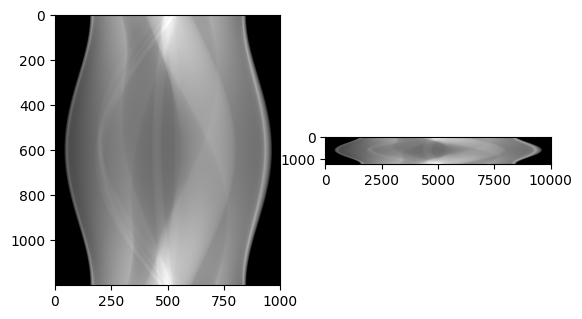

In [8]:
fig, axs = plt.subplots(1,2)

axs[0].imshow(sinogram, cmap="gray")

axs[1].imshow(sinogram_new, cmap="gray")


Reconstructing with 1 projections


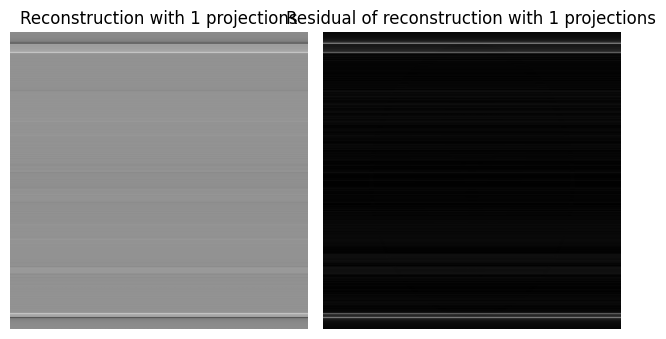

Reconstructing with 10 projections


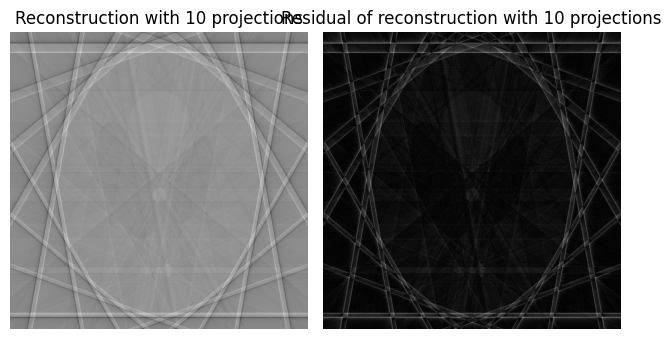

Reconstructing with 100 projections


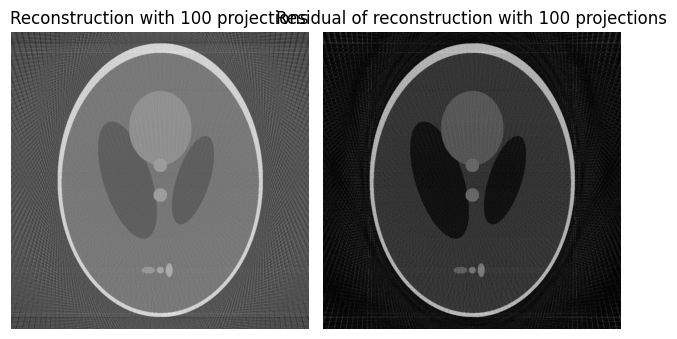

Reconstructing with 1000 projections


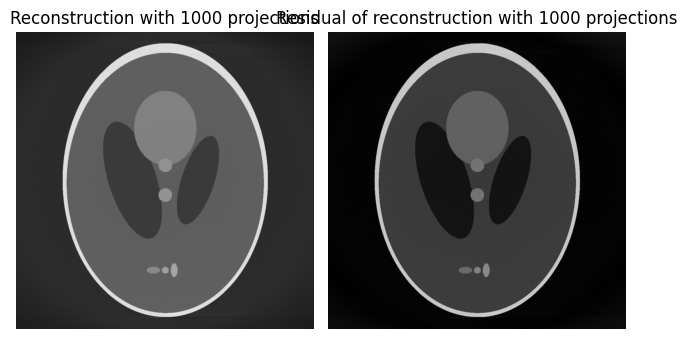

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from geometry import shepp_logan
from project import acquire_projections
from reconstruct import filter_projections, interpolate_projections, backproject, DiscreteWindowedRampFilter

N = 1001
K = [1,10,100,1000]
tau = 0.1
factor = 10

phantom = shepp_logan(N)

for k in K:
    print(f"Reconstructing with {k} projections")
    
    # Acquire projections
    P_theta = acquire_projections(phantom, n_projections=k, axis="x")
    
    # Filter projections
    Q_theta = filter_projections(P_theta, tau=tau)
    
    # Interpolate projections
    t = np.arange(-N // 2, N // 2) * tau
    t_new, Q_theta_interp = interpolate_projections(t, Q_theta, factor=factor)
    
    # Backproject to reconstruct the image
    recon = backproject(Q_theta_interp, N, t_new, tau)
    
    # Display the reconstruction
    plt.subplot(1,2,1)
    plt.imshow(recon, cmap="gray")
    plt.title(f"Reconstruction with {k} projections")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(np.abs(recon - phantom), cmap="gray")
    plt.title(f"Residual of reconstruction with {k} projections")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


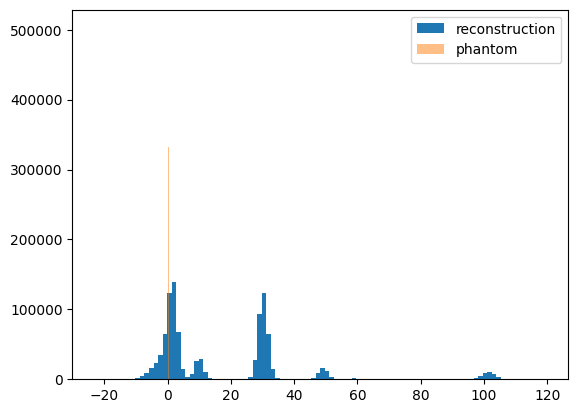

In [10]:
plt.hist(recon.flatten(), label="reconstruction", bins=100)
plt.hist(phantom.flatten(), label="phantom", bins=100, alpha=0.5)
plt.legend()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from geometry import shepp_logan
from project import acquire_projections, acquire_projections_vectorised
from time import time
from reconstruct import filter_projections, interpolate_projections, backproject, DiscreteWindowedRampFilter

N = 1001
K = [1,10,100,1000]
tau = 0.1
factor = 10

phantom = shepp_logan(N)

start = time()
P_theta = acquire_projections(phantom, n_projections=1000, axis="x")
end = time()

print(f"Time taken for acquire_projections: {end - start:.2f} seconds")



Time taken for acquire_projections: 203.49 seconds


Time taken for acquire_projections_vectorised: 84.89 seconds


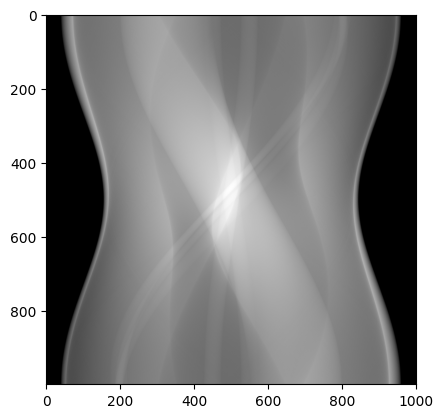

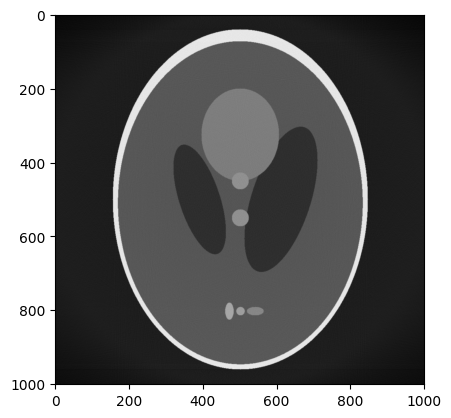

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from geometry import shepp_logan
from project import acquire_projections
from time import time
from reconstruct import filter_projections, interpolate_projections, backproject, DiscreteWindowedRampFilter

N = 1001
K = [1,10,100,1000]
tau = 0.1
factor = 10

phantom = shepp_logan(N)

start = time()
P_theta_vectorised = acquire_projections(phantom, n_projections=1000, axis="x", vectorised=True)
end = time()
print(f"Time taken for acquire_projections_vectorised: {end - start:.2f} seconds")

plt.imshow(P_theta_vectorised, cmap="gray")
plt.show()
# Filter projections
Q_theta = filter_projections(P_theta_vectorised, tau=tau)

# Interpolate projections
t = np.arange(-N // 2, N // 2) * tau
t_new, Q_theta_interp = interpolate_projections(t, Q_theta, factor=10)

# Backproject to reconstruct the image
recon = backproject(Q_theta_interp, N, t_new, tau)

plt.imshow(recon, cmap="gray")

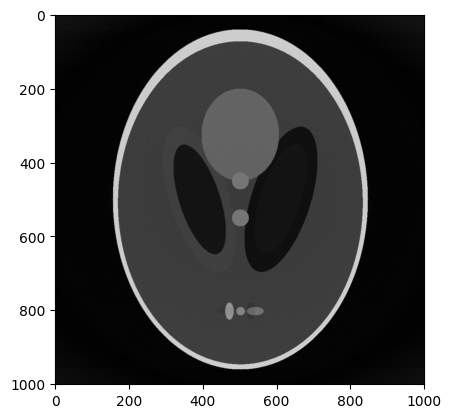

In [2]:
plt.imshow(np.abs(phantom - recon), cmap="gray")

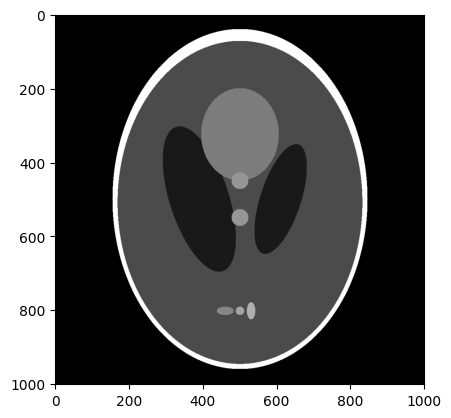

In [3]:
plt.imshow(phantom, cmap="gray")

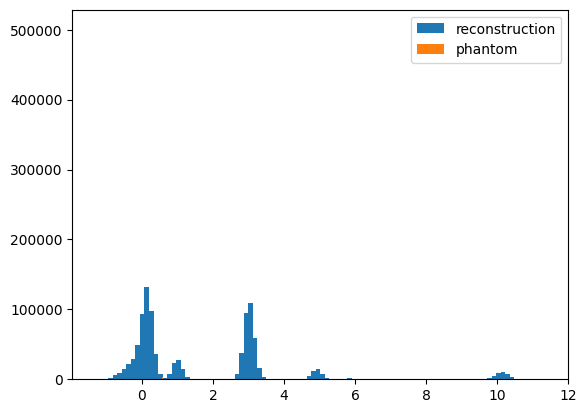

In [5]:
plt.hist(recon.flatten(), label="reconstruction", bins=100)
plt.hist(phantom.flatten(), label="phantom", bins=100)
plt.legend()

(array([5.03502e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.68790e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.32025e+05,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 4.04410e+04, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 8.19000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.30100e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.11000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 8.38

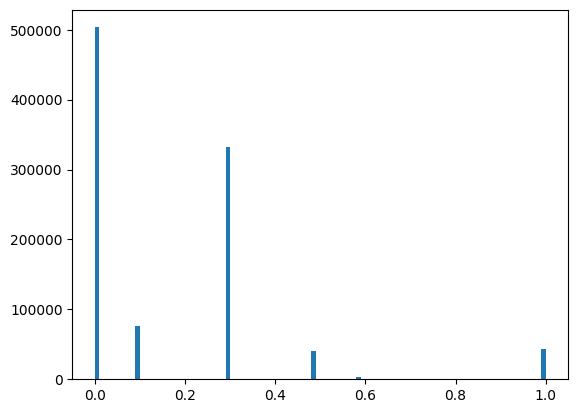

In [8]:
plt.hist(phantom.flatten(), label="phantom", bins=100)

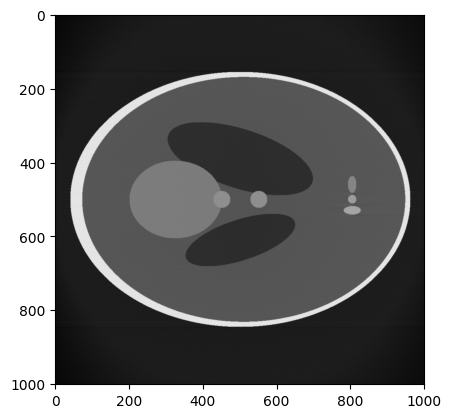

In [18]:
# Filter projections
Q_theta = filter_projections(P_theta_vectorised, tau=tau)

# Interpolate projections
t = np.arange(-N // 2, N // 2) * tau
t_new, Q_theta_interp = interpolate_projections(t, Q_theta, factor=10)

# Backproject to reconstruct the image
recon = backproject(Q_theta_interp, N, t_new, tau)

plt.imshow(recon, cmap="gray")

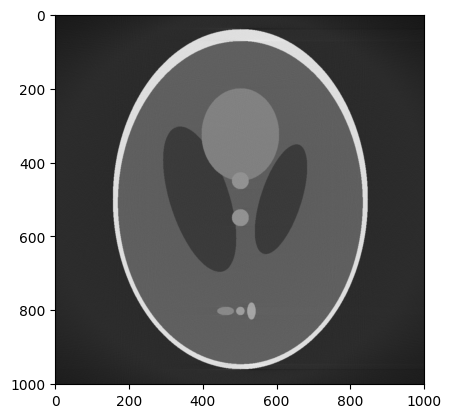

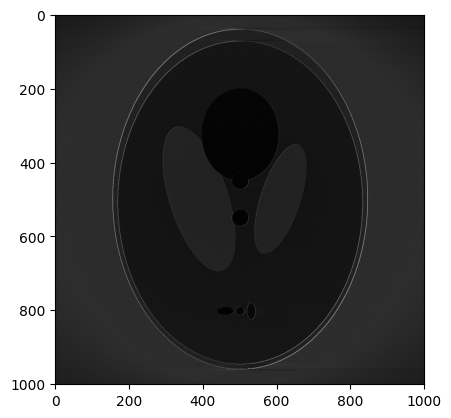

In [12]:
recon = (recon - recon.min()) / (recon.max() - recon.min())

plt.imshow(recon, cmap="gray")
plt.show()
plt.imshow(np.abs(recon - phantom), cmap="gray")
plt.show()

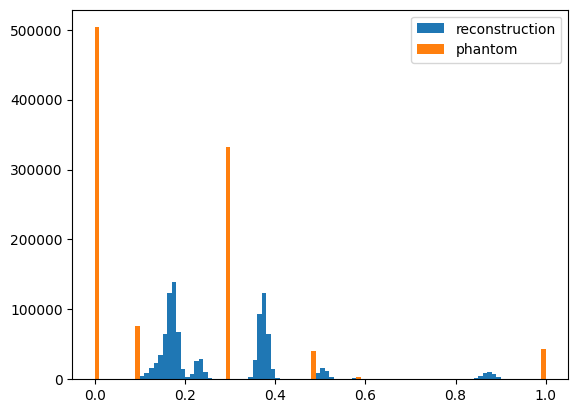

In [13]:
plt.hist(recon.flatten(), bins=100, label="reconstruction")
plt.hist(phantom.flatten(), bins=100, label="phantom")
plt.legend()
plt.show()

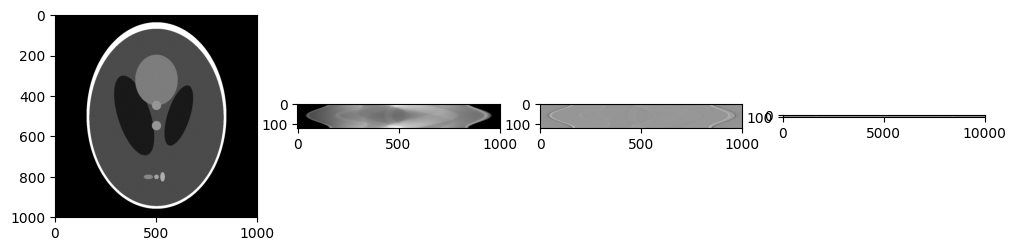

In [20]:
fig, axs = plt.subplots(1,4, figsize=(12, 48))

axs[0].imshow(phantom, cmap="gray")

axs[1].imshow(P_theta, cmap="gray")

axs[2].imshow(Q_theta, cmap="gray")

axs[3].imshow(Q_theta_interp, cmap="gray")


In [2]:
%load_ext autoreload
%autoreload 2

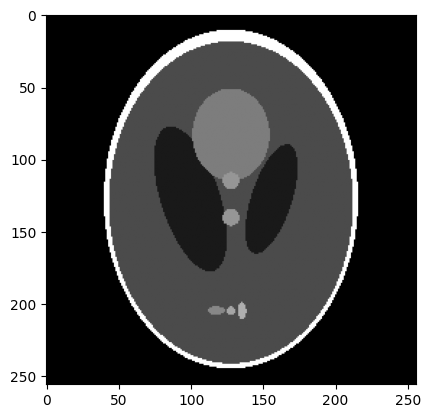

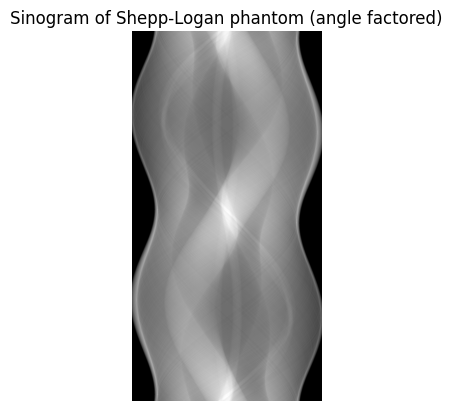

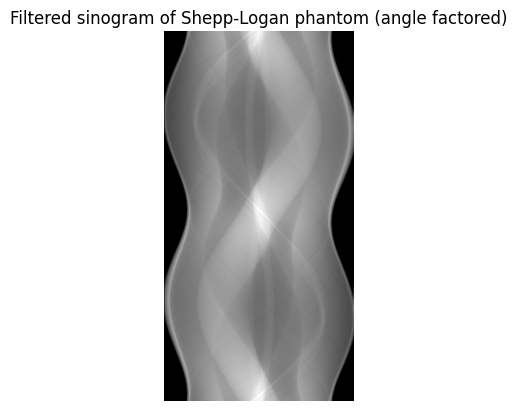

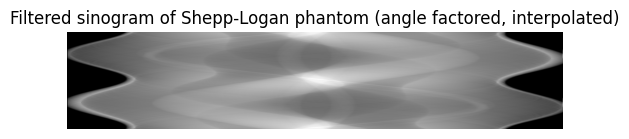

Text(0.5, 1.0, 'Reconstructed image from fan beam projections')

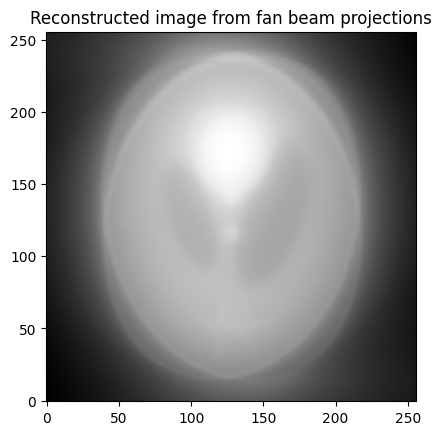

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geometry import shepp_logan, setup_geometry
from project import siddon_geom_numba
from reconstruct import DiscreteFanBeamFilter, interpolate_projections, filter_projections, build_filter, filter_projections_freq_kernel


# -----------------------------------
# Set up geometry parameters
# -----------------------------------
N = 256                      # phantom size
R_obj = N/2 * 0.9            # object fits in a 0.9·N radius
D_sd  = 1500.0               # source–detector distance in pixels
D_so  = 750.0                # source–object distance
fan_angle = 2*np.arcsin(R_obj / D_so)          # full fan angle covering object
N_det = 512                  # detector bins
delta_beta = fan_angle / N_det       # equi‑angular bin spacing
beta   = (np.arange(N_det) - (N_det-1)/2) * delta_beta     # detector angles wrt central ray
N_views = 1000
C = (0, 0)                # centre of rotation in lab frame

S, D_theta, D, theta, beta = setup_geometry(N, D_so, D_sd, R_obj, N_det, N_views)

# --------------------------------------------------------
# Acquire fan beam projections using Siddon's ray-tracing
# --------------------------------------------------------
phantom = shepp_logan(N)
plt.imshow(phantom, cmap="gray")
plt.show()

sinogram = np.zeros((N_views, N_det), dtype=np.float32)
for v in range(N_views):
    Sg = S[v]                     # (2,) source point for this view
    Dg_row = D[v]                 # (N_det, 2) all detector bins

    for i in range(N_det):
        sinogram[v, i] = siddon_geom_numba(phantom, Sg, Dg_row[i])

plt.imshow(sinogram, cmap="gray")

# ----------------------------------------------------------
# Step 1: Factor the sinogram by the source-object distance
# ----------------------------------------------------------

sinogram_factored = sinogram * D_so * np.cos(beta[None, :])
plt.imshow(sinogram_factored, cmap="gray")
plt.title("Sinogram of Shepp-Logan phantom (angle factored)")
plt.axis("off")
plt.show()

# ----------------------------------------------------------------
# Step 2: Filter the projections using a discrete fan beam filter
# ----------------------------------------------------------------
# filter = DiscreteFanBeamFilter(alpha=delta_beta)
filter = build_filter(N_det, filter_type="shepp-logan", cutoff=(np.pi / D_sd))
filtered_sinogram = filter_projections_freq_kernel(sinogram_factored, filter, delta_beta=delta_beta)
plt.imshow(filtered_sinogram, cmap="gray")
plt.title("Filtered sinogram of Shepp-Logan phantom (angle factored)")
plt.axis("off")
plt.show()

beta_interp, filtered_sinogram_interpolated = interpolate_projections(beta, filtered_sinogram, factor=10)
plt.imshow(filtered_sinogram_interpolated, cmap="gray")
plt.title("Filtered sinogram of Shepp-Logan phantom (angle factored, interpolated)")
plt.axis("off")
plt.show()

# --------------------------------------------
# Step 3: Backproject the filtered projections
# --------------------------------------------
y, x = np.mgrid[-N//2:N//2, -N//2:N//2]
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)

L = np.sqrt(
    (D_so + r[..., None] * np.sin(theta[np.newaxis, np.newaxis, :] - phi[..., None]))**2 + \
    (r[..., None] * np.cos(theta[np.newaxis, np.newaxis, :] - phi[..., None]))**2
    )
gamma = np.arctan2(
    (r[..., None] * np.cos(theta[np.newaxis, np.newaxis, :] - phi[..., None])),
    (D_so + r[..., None] * np.sin(theta[np.newaxis, np.newaxis, :] - phi[..., None]))
    )

Nx, Ny, M = L.shape
_, N_det_interp = filtered_sinogram_interpolated.shape

beta0 = -fan_angle / 2
beta_spacing_ang = delta_beta / 10
k = (gamma - beta0) / beta_spacing_ang
k_round = np.rint(k).astype(int)
k_round = np.clip(k_round, 0, N_det_interp - 1)

k_for_gather = k_round.transpose(2,0,1)                   # (M,Nx,Ny)
k_for_gather = k_for_gather.reshape(M, -1)                # (M, Nx*Ny)

Q = np.take_along_axis(filtered_sinogram_interpolated, k_for_gather, axis=1)

inv_L2 = 1.0 / (L**2)                                     # (Nx,Ny,M)
inv_L2 = inv_L2.transpose(2,0,1).reshape(M, -1)           # (M, Nx*Ny)

cos_gamma = np.cos(gamma).transpose(2,0,1).reshape(M, -1)
weighted = Q * inv_L2 * cos_gamma   # (M, Nx*Ny)    

f_flat = (2*np.pi / M) * np.sum(weighted, axis=0)         # (Nx*Ny,)
f = f_flat.reshape(Nx, Ny)

plt.imshow(f, cmap="gray", origin="lower")
plt.title("Reconstructed image from fan beam projections")


Text(0.5, 1.0, 'Reconstructed image from fan beam projections')

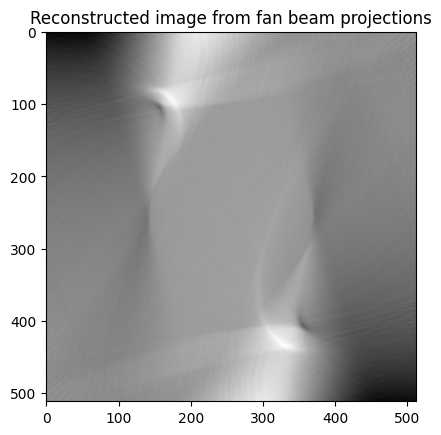

In [4]:
Nx, Ny, M = L.shape
_, N_det_interp = filtered_sinogram_interpolated.shape

beta0 = -fan_angle / 2
beta_spacing_ang = delta_beta / 10
k = (gamma - beta0) / delta_beta
k_round = np.rint(k).astype(int)
k_round = np.clip(k_round, 0, N_det_interp - 1)

k_for_gather = k_round.transpose(2,0,1)                   # (M,Nx,Ny)
k_for_gather = k_for_gather.reshape(M, -1)                # (M, Nx*Ny)

Q = np.take_along_axis(filtered_sinogram_interpolated, k_for_gather, axis=1)

inv_L2 = 1.0 / (L**2)                                     # (Nx,Ny,M)
inv_L2 = inv_L2.transpose(2,0,1).reshape(M, -1)           # (M, Nx*Ny)

weighted = Q * inv_L2                                     # (M, Nx*Ny)

f_flat = (2*np.pi / M) * np.sum(weighted, axis=0)         # (Nx*Ny,)
f = f_flat.reshape(Nx, Ny)

plt.imshow(f, cmap="gray")
plt.title("Reconstructed image from fan beam projections")